## 1. Problem Definition
> Set the class and the segment label of each customer and grouping into several segments which aims to how the company will treat customers in the future.

## 2. Data
> The original data set came from UCI Machine Learning Repository http://archive.ics.uci.edu/ml/datasets/online+retail
and there is also available on kaggle https://www.kaggle.com/carrie1/ecommerce-data

## 4. Features

>- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
df=pd.read_csv('Ecommerce.csv', engine='python')

In [3]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice  CustomerID         Country  Unnamed: 8  
0   29-Nov-16       2.55     17850.0  United Kingdom         NaN  
1   29-Nov-16       3.39     17850.0  United Kingdom         NaN  
2   29-Nov-16       2.75     17850.0  United Kingdom         NaN  
3   29-Nov-16       3.39     17850.0  United Kingdom         NaN  
4   29-Nov-16       3.39     17850.0  United Kingdom         NaN

In [4]:
df.drop('Unnamed: 8', axis=1, inplace=True)
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice  CustomerID         Country  
0   29-Nov-16       2.55     17850.0  United Kingdom  
1   29-Nov-16       3.39     17850.0  United Kingdom  
2   29-Nov-16       2.75     17850.0  United Kingdom  
3   29-Nov-16       3.39     17850.0  United Kingdom  
4   29-Nov-16       3.39     17850.0  United Kingdom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe(include='all')

InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909                              540455  541909.000000   
unique     25900      4070                                4223            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2313                                2369            NaN   
mean         NaN       NaN                                 NaN       9.552250   
std          NaN       NaN                                 NaN     218.081158   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       1.000000   
50%          NaN       NaN                                 NaN       3.000000   
75%          NaN       NaN                                 NaN      10.000000   
max          NaN       NaN                                 NaN   80995.000000   

       InvoiceDate      UnitPrice     CustomerID         Country  
count       541909  541909.000000  406829.000000          541909  
unique         305            NaN            NaN              38  
top       3-Dec-17            NaN            NaN  United Kingdom  
freq          5331            NaN            NaN          495478  
mean           NaN       4.611114   15287.690570             NaN  
std            NaN      96.759853    1713.600303             NaN  
min            NaN  -11062.060000   12346.000000             NaN  
25%            NaN       1.250000   13953.000000             NaN  
50%            NaN       2.080000   15152.000000             NaN  
75%            NaN       4.130000   16791.000000             NaN  
max            NaN   38970.000000   18287.000000             NaN

- There are some missing values at 'CustomerID' column and 'Description' column
- there are negative value at 'Quantity' and 'UnitPrice', why is that minus values?
- Maybe i should change InvoiceDate dtype

## Check Missing Value

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df[df['Description'].isnull()].head(20)

InvoiceNo StockCode Description  Quantity InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56   29-Nov-16        0.0   
1970    536545     21134         NaN         1   29-Nov-16        0.0   
1971    536546     22145         NaN         1   29-Nov-16        0.0   
1972    536547     37509         NaN         1   29-Nov-16        0.0   
1987    536549    85226A         NaN         1   29-Nov-16        0.0   
1988    536550     85044         NaN         1   29-Nov-16        0.0   
2024    536552     20950         NaN         1   29-Nov-16        0.0   
2025    536553     37461         NaN         3   29-Nov-16        0.0   
2026    536554     84670         NaN        23   29-Nov-16        0.0   
2406    536589     21777         NaN       -10   29-Nov-16        0.0   
4347    536764    84952C         NaN       -38   30-Nov-16        0.0   
4348    536765    84952C         NaN        19   30-Nov-16        0.0   
7187    536995     35951         NaN        57    1-Dec-16        0.0   
7188    536996     22712         NaN       -20    1-Dec-16        0.0   
7189    536997     22028         NaN       -20    1-Dec-16        0.0   
7190    536998     85067         NaN        -6    1-Dec-16        0.0   
7191    536999     21421         NaN       110    1-Dec-16        0.0   
7192    537000     21414         NaN       -22    1-Dec-16        0.0   
7193    537001     21653         NaN        -6    1-Dec-16        0.0   
7194    537002     21651         NaN        70    1-Dec-16        0.0   

      CustomerID         Country  
622          NaN  United Kingdom  
1970         NaN  United Kingdom  
1971         NaN  United Kingdom  
1972         NaN  United Kingdom  
1987         NaN  United Kingdom  
1988         NaN  United Kingdom  
2024         NaN  United Kingdom  
2025         NaN  United Kingdom  
2026         NaN  United Kingdom  
2406         NaN  United Kingdom  
4347         NaN  United Kingdom  
4348         NaN  United Kingdom  
7187         NaN  United Kingdom  
7188         NaN  United Kingdom  
7189         NaN  United Kingdom  
7190         NaN  United Kingdom  
7191         NaN  United Kingdom  
7192         NaN  United Kingdom  
7193         NaN  United Kingdom  
7194         NaN  United Kingdom

In [9]:
df[df['CustomerID'].isnull()].head(20)

InvoiceNo StockCode                          Description  Quantity  \
622     536414     22139                                  NaN        56   
1443    536544     21773      DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774      DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786                   POLKADOT RAIN HAT          4   
1446    536544     21787                RAIN PONCHO RETROSPOT         2   
1447    536544     21790                   VINTAGE SNAP CARDS         9   
1448    536544     21791   VINTAGE HEADS AND TAILS CARD GAME          2   
1449    536544     21801  CHRISTMAS TREE DECORATION WITH BELL        10   
1450    536544     21802      CHRISTMAS TREE HEART DECORATION         9   
1451    536544     21803       CHRISTMAS TREE STAR DECORATION        11   
1452    536544     21809     CHRISTMAS HANGING TREE WITH BELL         1   
1453    536544     21810     CHRISTMAS HANGING STAR WITH BELL         3   
1454    536544     21811    CHRISTMAS HANGING HEART WITH BELL         1   
1455    536544     21821     GLITTER STAR GARLAND WITH BELLS          1   
1456    536544     21822    GLITTER CHRISTMAS TREE WITH BELLS         1   
1457    536544     21823  PAINTED METAL HEART WITH HOLLY BELL         2   
1458    536544     21844                    RED RETROSPOT MUG         2   
1459    536544     21851       LILAC DIAMANTE PEN IN GIFT BOX         1   
1460    536544     21870     I CAN ONLY PLEASE ONE PERSON MUG         1   
1461    536544     21871                  SAVE THE PLANET MUG         5   

     InvoiceDate  UnitPrice  CustomerID         Country  
622    29-Nov-16       0.00         NaN  United Kingdom  
1443   29-Nov-16       2.51         NaN  United Kingdom  
1444   29-Nov-16       2.51         NaN  United Kingdom  
1445   29-Nov-16       0.85         NaN  United Kingdom  
1446   29-Nov-16       1.66         NaN  United Kingdom  
1447   29-Nov-16       1.66         NaN  United Kingdom  
1448   29-Nov-16       2.51         NaN  United Kingdom  
1449   29-Nov-16       0.43         NaN  United Kingdom  
1450   29-Nov-16       0.43         NaN  United Kingdom  
1451   29-Nov-16       0.43         NaN  United Kingdom  
1452   29-Nov-16       2.51         NaN  United Kingdom  
1453   29-Nov-16       2.51         NaN  United Kingdom  
1454   29-Nov-16       2.51         NaN  United Kingdom  
1455   29-Nov-16       7.62         NaN  United Kingdom  
1456   29-Nov-16       4.21         NaN  United Kingdom  
1457   29-Nov-16       2.98         NaN  United Kingdom  
1458   29-Nov-16       5.91         NaN  United Kingdom  
1459   29-Nov-16       4.21         NaN  United Kingdom  
1460   29-Nov-16       3.36         NaN  United Kingdom  
1461   29-Nov-16       3.36         NaN  United Kingdom

So i decide to drop all missing value in Description column and change missing value in customerID as 'Anonymous'

In [10]:
df=df.dropna(subset=['Description'])

In [11]:
df['CustomerID'].fillna('Anonymous', inplace=True)

In [12]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
df[df['Quantity']<=0]

InvoiceNo     StockCode                          Description  Quantity  \
141      C536379             D                             Discount        -1   
154      C536383        35004C      SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391         22556       PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391         21984     PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391         21983     PACK OF 12 BLUE PAISLEY TISSUES        -24   
238      C536391         21980    PACK OF 12 RED RETROSPOT TISSUES        -24   
239      C536391         21484          CHICK GREY HOT WATER BOTTLE       -12   
240      C536391         22557     PLASTERS IN TIN VINTAGE PAISLEY        -12   
241      C536391         22553               PLASTERS IN TIN SKULLS       -24   
939      C536506         22960             JAM MAKING SET WITH JARS        -6   
1441     C536543         22632            HAND WARMER RED RETROSPOT        -1   
1442     C536543         22355            CHARLOTTE BAG SUKI DESIGN        -2   
1973     C536548         22244           3 HOOK HANGER MAGIC GARDEN        -4   
1974     C536548         22242        5 HOOK HANGER MAGIC TOADSTOOL        -5   
1975     C536548         20914  SET/5 RED RETROSPOT LID GLASS BOWLS        -1   
1976     C536548         22892    SET OF SALT AND PEPPER TOADSTOOLS        -7   
1977     C536548         22654                   DELUXE SEWING KIT         -1   
1978     C536548         22767          TRIPLE PHOTO FRAME CORNICE         -2   
1979     C536548         22333    RETROSPOT PARTY BAG + STICKER SET        -1   
1980     C536548         22245         HOOK, 1 HANGER ,MAGIC GARDEN        -2   
1981     C536548         22077               6 RIBBONS RUSTIC CHARM        -6   
1982     C536548         22631             CIRCUS PARADE LUNCH BOX         -1   
1983     C536548         22168        ORGANISER WOOD ANTIQUE WHITE         -2   
1984     C536548         21218               RED SPOTTY BISCUIT TIN        -3   
1985     C536548         20957         PORCELAIN HANGING BELL SMALL        -1   
1986     C536548         22580         ADVENT CALENDAR GINGHAM SACK        -4   
3170     C536606         20914  SET/5 RED RETROSPOT LID GLASS BOWLS        -2   
3338     C536622         22752         SET 7 BABUSHKA NESTING BOXES        -2   
3410     C536625         22839      3 TIER CAKE TIN GREEN AND CREAM        -2   
3693     C536642         21463                 MIRRORED DISCO BALL         -1   
3911     C536734         22780       LIGHT GARLAND BUTTERFILES PINK        -4   
3912     C536734         85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        -1   
3919     C536737         22798     ANTIQUE GLASS DRESSING TABLE POT        -2   
4287     C536757         84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
4288     C536758         21314        SMALL GLASS HEART TRINKET POT        -1   
4306     C536760         22175                    PINK OWL SOFT TOY        -1   
4307     C536760         22273                 FELTCRAFT DOLL MOLLY        -3   
4836     C536807         22501           PICNIC BASKET WICKER LARGE        -2   
4837     C536807         22778                   GLASS CLOCHE SMALL        -1   
4853     C536812         22578   WOODEN STAR CHRISTMAS SCANDINAVIAN       -36   
4854     C536812         22574    HEART WOODEN CHRISTMAS DECORATION      -192   
4855     C536812         22593               CHRISTMAS GINGHAM STAR      -144   
4856     C536812         22595              CHRISTMAS GINGHAM HEART      -144   
4857     C536812         22588            CARD HOLDER GINGHAM HEART      -192   
4858     C536812         22130     PARTY CONE CHRISTMAS DECORATION       -144   
4876     C536814         21527    RED RETROSPOT TRADITIONAL TEAPOT         -2   
4877     C536814        72799E     IVORY PILLAR CANDLE SILVER FLOCK        -6   
4878     C536814         85066          CREAM SWEETHEART MINI CHEST        -2   
4879     C536814         21586      KI

In [14]:
df[df['UnitPrice']<=0]

InvoiceNo     StockCode                          Description  Quantity  \
6391      536941         22734                               amazon        20   
6392      536942         22139                               amazon        15   
7313      537032         21275                                    ?       -30   
9302      537197         22841         ROUND CAKE TIN VINTAGE GREEN         1   
13217     537425        84968F                                check       -20   
13218     537426        84968E                                check       -35   
13264     537432        35833G                              damages       -43   
14335     537534         85064         CREAM SWEETHEART LETTER RACK         1   
14336     537534         84832     ZINC WILLIE WINKIE  CANDLE STICK         1   
14337     537534         84692          BOX OF 24 COCKTAIL PARASOLS         2   
14338     537534         48184                DOORMAT ENGLISH ROSE          3   
14339     537534         48111                DOORMAT 3 SMILEY CATS         1   
14340     537534         22697      GREEN REGENCY TEACUP AND SAUCER         1   
14341     537534         22682        FRENCH BLUE METAL DOOR SIGN 7         1   
14342     537534         22680        FRENCH BLUE METAL DOOR SIGN 5         1   
14343     537534         22681        FRENCH BLUE METAL DOOR SIGN 6         2   
14344     537534         22679        FRENCH BLUE METAL DOOR SIGN 4         5   
14345     537534         22686       FRENCH BLUE METAL DOOR SIGN No         2   
14346     537534         22683        FRENCH BLUE METAL DOOR SIGN 8         3   
14347     537534         22676        FRENCH BLUE METAL DOOR SIGN 1         3   
14348     537534         22625                   RED KITCHEN SCALES         1   
14349     537534         22624                 IVORY KITCHEN SCALES         3   
14350     537534         22619            SET OF 6 SOLDIER SKITTLES         1   
14351     537534         22520           CHILDS GARDEN TROWEL BLUE          1   
14352     537534         22524         CHILDRENS GARDEN GLOVES BLUE         3   
14353     537534         22502           PICNIC BASKET WICKER SMALL        29   
14354     537534         22501           PICNIC BASKET WICKER LARGE         2   
14355     537534         22476     EMPIRE UNION JACK TV DINNER TRAY         1   
14356     537534         22473       TV DINNER TRAY VINTAGE PAISLEY         1   
14357     537534         22474              SPACEBOY TV DINNER TRAY         1   
14358     537534         22472            TV DINNER TRAY DOLLY GIRL         1   
14359     537534         22520           CHILDS GARDEN TROWEL BLUE          1   
14360     537534         22514             CHILDS GARDEN SPADE BLUE         1   
14361     537534         22516              CHILDS GARDEN RAKE BLUE         1   
14362     537534         22432              WATERING CAN PINK BUNNY         1   
14363     537534         22428             ENAMEL FIRE BUCKET CREAM         3   
14364     537534         22427              ENAMEL FLOWER JUG CREAM         1   
14365     537534         22376    AIRLINE BAG VINTAGE JET SET WHITE         1   
14366     537534         22375    AIRLINE BAG VINTAGE JET SET BROWN         1   
14367     537534         22372  AIRLINE BAG VINTAGE WORLD CHAMPION          1   
14368     537534         22371         AIRLINE BAG VINTAGE TOKYO 78         5   
14369     537534         22620          4 TRADITIONAL SPINNING TOPS         1   
14370     537534         22624                 IVORY KITCHEN SCALES         1   
14371     537534         22109         FULL ENGLISH BREAKFAST PLATE         1   
14372     537534         22367      CHILDRENS APRON SPACEBOY DESIGN         1   
14373     537534         22366                     DOORMAT AIRMAIL          1   
14374     537534         22364         GLASS JAR DIGESTIVE BISCUITS         1   
14375     537534         22362         GLASS JAR PEACOCK BATH SALTS         3   
14376     537534         22360      GL

In [15]:
df[df['CustomerID']==17548]

InvoiceNo StockCode                        Description  Quantity  \
235      C536391     22556     PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984   PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   
238      C536391     21980  PACK OF 12 RED RETROSPOT TISSUES        -24   
239      C536391     21484        CHICK GREY HOT WATER BOTTLE       -12   
240      C536391     22557   PLASTERS IN TIN VINTAGE PAISLEY        -12   
241      C536391     22553             PLASTERS IN TIN SKULLS       -24   
165024    550755     22585          PACK OF 6 BIRDY GIFT TAGS        24   
165025    550755     22082        RIBBON REEL STRIPES DESIGN         10   
165026    550755     22081         RIBBON REEL FLORA + FAUNA         10   
165027    550755     22079         RIBBON REEL HEARTS DESIGN         10   
165028    550755     22926     IVORY GIANT GARDEN THERMOMETER         4   
177223   C552049     22926     IVORY GIANT GARDEN THERMOMETER        -4   
177224   C552049     22585          PACK OF 6 BIRDY GIFT TAGS       -24   
177225   C552049     22082        RIBBON REEL STRIPES DESIGN        -10   
177226   C552049     22081         RIBBON REEL FLORA + FAUNA        -10   
177227   C552049     22079         RIBBON REEL HEARTS DESIGN        -10   

       InvoiceDate  UnitPrice CustomerID         Country  
235      29-Nov-16       1.65      17548  United Kingdom  
236      29-Nov-16       0.29      17548  United Kingdom  
237      29-Nov-16       0.29      17548  United Kingdom  
238      29-Nov-16       0.29      17548  United Kingdom  
239      29-Nov-16       3.45      17548  United Kingdom  
240      29-Nov-16       1.65      17548  United Kingdom  
241      29-Nov-16       1.65      17548  United Kingdom  
165024   18-Apr-17       1.25      17548  United Kingdom  
165025   18-Apr-17       1.65      17548  United Kingdom  
165026   18-Apr-17       1.65      17548  United Kingdom  
165027   18-Apr-17       1.65      17548  United Kingdom  
165028   18-Apr-17       5.95      17548  United Kingdom  
177223    4-May-17       5.95      17548  United Kingdom  
177224    4-May-17       1.25      17548  United Kingdom  
177225    4-May-17       1.65      17548  United Kingdom  
177226    4-May-17       1.65      17548  United Kingdom  
177227    4-May-17       1.65      17548  United Kingdom

So i assume that negative and 0 value in Quantity column is canceled order/return items and just leave it like that.

In [16]:
# change 'InvoiceDate' column type
import datetime as dt
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  object        
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 37.1+ MB


In [17]:
df['Year'], df['Month']=df['InvoiceDate'].dt.year, df['InvoiceDate'].dt.month
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice CustomerID         Country  Year  Month  
0  2016-11-29       2.55      17850  United Kingdom  2016     11  
1  2016-11-29       3.39      17850  United Kingdom  2016     11  
2  2016-11-29       2.75      17850  United Kingdom  2016     11  
3  2016-11-29       3.39      17850  United Kingdom  2016     11  
4  2016-11-29       3.39      17850  United Kingdom  2016     11

In [18]:
# show how many CustomerID amount
country_id=df[['Country', 'CustomerID']].drop_duplicates()
country_id.groupby(['Country'])['CustomerID'].count().reset_index().sort_values('CustomerID', ascending=False)

Country  CustomerID
36        United Kingdom        3951
14               Germany          95
13                France          88
31                 Spain          31
3                Belgium          25
33           Switzerland          22
27              Portugal          20
19                 Italy          15
12               Finland          12
1                Austria          11
25                Norway          10
24           Netherlands           9
0              Australia           9
9                Denmark           9
6        Channel Islands           9
7                 Cyprus           8
32                Sweden           8
20                 Japan           8
26                Poland           6
37           Unspecified           5
18                Israel           5
10                  EIRE           4
34                   USA           4
15                Greece           4
5                 Canada           4
2                Bahrain           3
23                 Malta           2
35  United Arab Emirates           2
30             Singapore           1
4                 Brazil           1
29          Saudi Arabia           1
21               Lebanon           1
28                   RSA           1
16             Hong Kong           1
17               Iceland           1
8         Czech Republic           1
22             Lithuania           1
11    European Community           1

### RFM
>* Recency = Latest Transaction Date - Last Invoice Data
* Frequency = count of invoice no. of transaction
* Monetary = Sum of total spend for each customer id

In [19]:
# Make new column named 'spend', which is contains the total amount
df['spend']=df['Quantity']*df['UnitPrice']
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice CustomerID         Country  Year  Month  spend  
0  2016-11-29       2.55      17850  United Kingdom  2016     11  15.30  
1  2016-11-29       3.39      17850  United Kingdom  2016     11  20.34  
2  2016-11-29       2.75      17850  United Kingdom  2016     11  22.00  
3  2016-11-29       3.39      17850  United Kingdom  2016     11  20.34  
4  2016-11-29       3.39      17850  United Kingdom  2016     11  20.34

In [20]:
# separate into 2 dataframe because data from UK so dominating (df_uk and df_other)
df_uk=df[df.Country=='United Kingdom']
df_other=df[df.Country!='United Kingdom']

In [21]:
# check data shape
print(df_uk.shape, df_other.shape)

(494024, 11) (46431, 11)


# United Kingdom Data

In [22]:
# check the last transaction
df_uk['InvoiceDate'].sort_values(ascending=False).head()

541893   2017-12-07
540818   2017-12-07
540820   2017-12-07
540821   2017-12-07
540822   2017-12-07
Name: InvoiceDate, dtype: datetime64[ns]

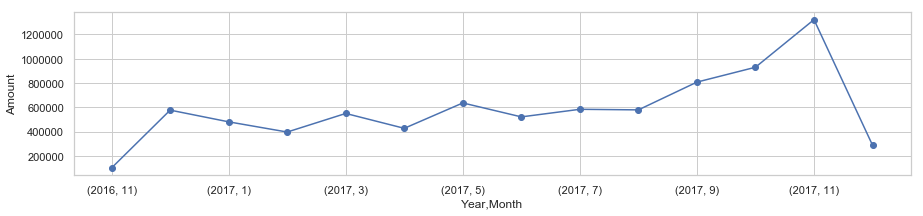

In [23]:
df_uk.groupby(['Year', 'Month']).spend.sum().plot(marker='o', figsize=(15,3))
plt.ylabel('Amount')
plt.show()

In [24]:
# create rfm_uk table
latest_date_uk=dt.datetime(2017,12,8)
rfm_uk=df_uk.groupby(df_uk['CustomerID']).agg({'InvoiceDate': lambda x:(latest_date_uk-x.max()).days, # Recency
                                            'InvoiceNo': lambda x:len(x), # Frequency
                                            'spend': lambda x:x.sum()}).reset_index() # Monetary
rfm_uk.head()

CustomerID  InvoiceDate  InvoiceNo     spend
0      12346          326          2      0.00
1      12747            3        103   4196.01
2      12748            1       4642  29072.10
3      12749            4        231   3868.20
4      12820            4         59    942.34

In [25]:
# Check the difference between count and len
# print(df['InvoiceNo'].count(),
# len(df['InvoiceNo']))

In [26]:
# change rfm_uk column name
rfm_uk.rename(columns={'InvoiceDate': 'Recency',
                'InvoiceNo': 'Frequency',
                'spend': 'Monetary'}, inplace=True)
rfm_uk.head()

CustomerID  Recency  Frequency  Monetary
0      12346      326          2      0.00
1      12747        3        103   4196.01
2      12748        1       4642  29072.10
3      12749        4        231   3868.20
4      12820        4         59    942.34

In [27]:
# divide the category using quantile into 5 category
quantiles_uk=rfm_uk.quantile(q=[0.20, 0.40, 0.60, 0.80])
quantiles_uk=quantiles_uk.to_dict()
quantiles_uk

{'Recency': {0.2: 12.0, 0.4: 32.0, 0.6: 71.0, 0.8: 179.0},
 'Frequency': {0.2: 13.0, 0.4: 29.0, 0.6: 58.0, 0.8: 123.0},
 'Monetary': {0.2: 227.38999999999996,
  0.4: 443.6,
  0.6: 867.3800000000001,
  0.8: 1900.89}}

In [28]:
# RFM Function (1 is the best score and 5 is the worst)

def r_score(x,p,d):
    if x<= d[p][0.20]:
        return 1
    elif x<= d[p][0.40]:
        return 2
    elif x<= d[p][0.60]:
        return 3
    elif x<=d[p][0.80]:
        return 4
    else:
        return 5

def fm_score(x,p,d):
    if x<= d[p][0.20]:
        return 5
    elif x<= d[p][0.40]:
        return 4
    elif x<= d[p][0.60]:
        return 3
    elif x<=d[p][0.80]:
        return 2
    else:
        return 1

In [29]:
# creat new table that contains R, F, M scores 
rfm_uk['R']=rfm_uk['Recency'].apply(r_score, args=('Recency',quantiles_uk,))
rfm_uk['F']=rfm_uk['Frequency'].apply(fm_score, args=('Frequency',quantiles_uk,))
rfm_uk['M']=rfm_uk['Monetary'].apply(fm_score, args=('Monetary',quantiles_uk,))
rfm_uk.head()

CustomerID  Recency  Frequency  Monetary  R  F  M
0      12346      326          2      0.00  5  5  5
1      12747        3        103   4196.01  1  2  1
2      12748        1       4642  29072.10  1  1  1
3      12749        4        231   3868.20  1  1  1
4      12820        4         59    942.34  1  2  2

In [30]:
# create new table that contains the total of R+F+M scores
rfm_uk['Scores']=(rfm_uk.R.map(int) + rfm_uk.F.map(int) + rfm_uk.M.map(int))
rfm_uk.head()

CustomerID  Recency  Frequency  Monetary  R  F  M  Scores
0      12346      326          2      0.00  5  5  5      15
1      12747        3        103   4196.01  1  2  1       4
2      12748        1       4642  29072.10  1  1  1       3
3      12749        4        231   3868.20  1  1  1       3
4      12820        4         59    942.34  1  2  2       5

In [31]:
# label each customerID based on total RFM Scores using pandas.qcut
label=['Diamond', 'Platinum', 'Gold', 'Silver', 'Bronze']
level_uk=pd.qcut(rfm_uk['Scores'], q=5, labels=label)
rfm_uk['Class']=level_uk.values
rfm_uk.head()

CustomerID  Recency  Frequency  Monetary  R  F  M  Scores    Class
0      12346      326          2      0.00  5  5  5      15   Bronze
1      12747        3        103   4196.01  1  2  1       4  Diamond
2      12748        1       4642  29072.10  1  1  1       3  Diamond
3      12749        4        231   3868.20  1  1  1       3  Diamond
4      12820        4         59    942.34  1  2  2       5  Diamond

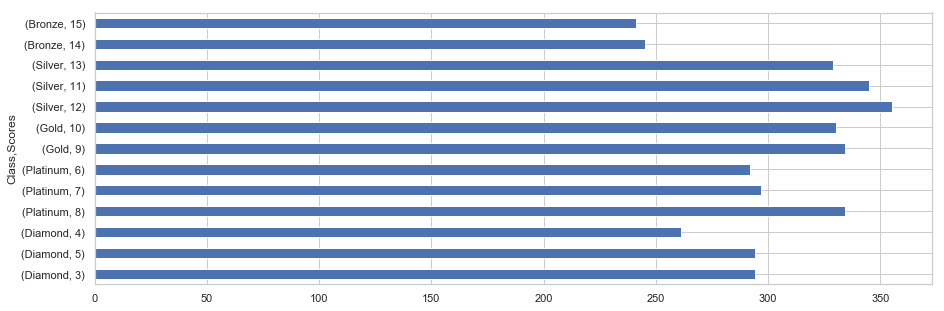

In [32]:
# Check class splitting
rfm_uk.groupby('Class').Scores.value_counts().plot(kind='barh', figsize=(15,5))
plt.savefig('class_score_distribution.png', bbox_inches='tight')
plt.show()

In [33]:
rfm_uk[rfm_uk['Scores']==3]

CustomerID  Recency  Frequency    Monetary  R  F  M  Scores    Class
2         12748        1       4642    29072.10  1  1  1       3  Diamond
3         12749        4        231     3868.20  1  1  1       3  Diamond
21        12839        3        316     5583.62  1  1  1       3  Diamond
23        12841        5        439     3876.40  1  1  1       3  Diamond
35        12856        8        317     2162.68  1  1  1       3  Diamond
61        12901        9        125    16293.10  1  1  1       3  Diamond
75        12921        4        741    16389.74  1  1  1       3  Diamond
85        12935        3        130     2156.45  1  1  1       3  Diamond
102       12955        2        183     4734.26  1  1  1       3  Diamond
104       12957        5        244     3979.04  1  1  1       3  Diamond
112       12971        4        308    10930.26  1  1  1       3  Diamond
132       13001        5        342     9797.92  1  1  1       3  Diamond
135       13004       12        409     5613.43  1  1  1       3  Diamond
141       13013        2        222     4786.99  1  1  1       3  Diamond
142       13014        3        124     3365.43  1  1  1       3  Diamond
147       13021        5        134     2584.40  1  1  1       3  Diamond
168       13050       10        422     5684.61  1  1  1       3  Diamond
181       13069        1        470     3717.82  1  1  1       3  Diamond
186       13078        2        380    12432.28  1  1  1       3  Diamond
189       13081        2       1061    27964.48  1  1  1       3  Diamond
193       13089        3       1857    57385.88  1  1  1       3  Diamond
194       13090        9        161     8689.39  1  1  1       3  Diamond
201       13098        2        605    28658.88  1  1  1       3  Diamond
204       13102        2        310     6336.29  1  1  1       3  Diamond
212       13113        1        280    10510.00  1  1  1       3  Diamond
213       13115        9        132     2205.63  1  1  1       3  Diamond
221       13126        5        142     2056.29  1  1  1       3  Diamond
230       13137       11        705     3605.08  1  1  1       3  Diamond
276       13198       11        229     3384.09  1  1  1       3  Diamond
299       13230        5        612     2763.41  1  1  1       3  Diamond
323       13263        2       1677     7454.07  1  1  1       3  Diamond
325       13266       12        202     3717.67  1  1  1       3  Diamond
326       13267        3        224     4404.44  1  1  1       3  Diamond
328       13269        2        320     5315.92  1  1  1       3  Diamond
365       13319        6        500    10664.34  1  1  1       3  Diamond
398       13362        4        169     3085.49  1  1  1       3  Diamond
401       13365        9        132     2191.22  1  1  1       3  Diamond
419       13394        2        164     2312.80  1  1  1       3  Diamond
428       13408        2        501    27487.41  1  1  1       3  Diamond
434       13418       12        314     5845.44  1  1  1       3  Diamond
440       13426        1        159     3550.70  1  1  1       3  Diamond
461       13458        8        394     9537.92  1  1  1       3  Diamond
468       13468        2        306     5656.75  1  1  1       3  Diamond
470       13471        2        260     2531.58  1  1  1       3  Diamond
497       13507        4        162     2479.16  1  1  1       3  Diamond
519       13534        3        342     5613.08  1  1  1       3  Diamond
520       13536        2        179     3448.29  1  1  1       3  Diamond
546       13576       11        130     6703.30  1  1  1       3  Diamond
562       13599        2        264     5030.60  1  1  1       3  Diamond
591       13644        9        148     2597.52  1  1  1       3  Diamond
608       13668        3        501     6216.07  1  1  1       3  Diamond
615       13680        2        216     2202.31  1  1  1       3  Diamond
625       13694        4        585    62653.10  1  1  1       3  Diamond
631      

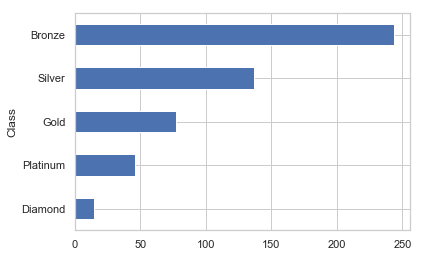

In [34]:
rfm_uk.groupby('Class').Recency.mean().plot(kind='barh')

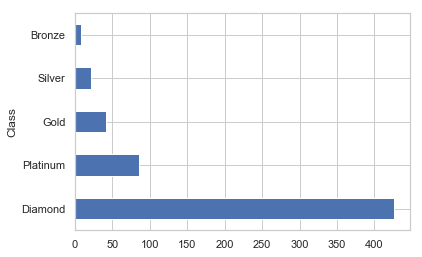

In [35]:
rfm_uk.groupby('Class').Frequency.mean().plot(kind='barh')

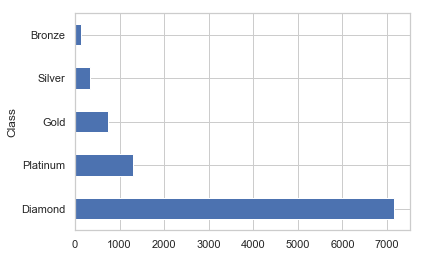

In [36]:
rfm_uk.groupby('Class').Monetary.mean().plot(kind='barh')

https://www.putler.com/rfm-analysis/
>
* Champions 	4-5, 	4-5
* Loyal Customers 	2-5, 	3-5
* Potential Loyalist 	3-5, 	1-3
* Recent Customers 	4-5, 	0-1
* Promising 	3-4, 	0-1
* Customers Needing Attention 	2-3, 	2-3
* About To Sleep 	2-3, 	0-2
* At Risk 	0-2, 	2-5
* Can’t Lose Them 	0-1, 	4-5
* Hibernating 	1-2, 	1-2
* Lost 	0-2, 	0-2

In [37]:
# create new table that contains the total of R+F+M scores
rfm_uk['RFMScores']=(rfm_uk.R.map(str) + rfm_uk.F.map(str) + rfm_uk.M.map(str))
rfm_uk.head()

CustomerID  Recency  Frequency  Monetary  R  F  M  Scores    Class RFMScores
0      12346      326          2      0.00  5  5  5      15   Bronze       555
1      12747        3        103   4196.01  1  2  1       4  Diamond       121
2      12748        1       4642  29072.10  1  1  1       3  Diamond       111
3      12749        4        231   3868.20  1  1  1       3  Diamond       111
4      12820        4         59    942.34  1  2  2       5  Diamond       122

In [38]:
segment={r'[4-5][3-4-5][3-4-5]': 'Hibernating',
    r'[4-5][1-2-3][1-2]': 'Can\'t Lose',
    r'[3-4][4-5][4-5]': 'About to Sleep',
    r'[3-4][2-3-4][2-3-4]': 'Need Attention',
    r'[3-4][1-2-3][1-2-3]': 'Loyal Customers',
    r'[1-2-3][1-2-3][4-5]': 'Low Spending loyal customers', 
    r'[2-3-4][4-5][4-5]': 'Promising',
    r'1[4-5][4-5]': 'New Customers',
    r'[1-2-3][1-2-3][3-4-5]': 'Potential Loyalists',
    r'[1-2][1-2][1-2]': 'Best Customers',
    r'[4-5][1-2-3-4-5][3-4-5]': 'Churned Customers',
    r'[1-2][3-4-5][1-2]': 'High-spending New Customers',
    r'[3-4-5][4-5][1-2]': 'Rare High Spenders',
    r'[1-2-3][4-5]3': 'Loyal Middle Class Spenders'}

In [39]:
rfm_uk['Segment']=rfm_uk['RFMScores'].replace(segment, regex=True)
rfm_uk['Segment'].value_counts()

Hibernating                     1172
Best Customers                   839
Need Attention                   405
Can't Lose                       246
About to Sleep                   226
Potential Loyalists              215
Loyal Customers                  179
Promising                        143
Low Spending loyal customers     143
High-spending New Customers      135
New Customers                     82
Loyal Middle Class Spenders       72
Rare High Spenders                49
Churned Customers                 45
Name: Segment, dtype: int64

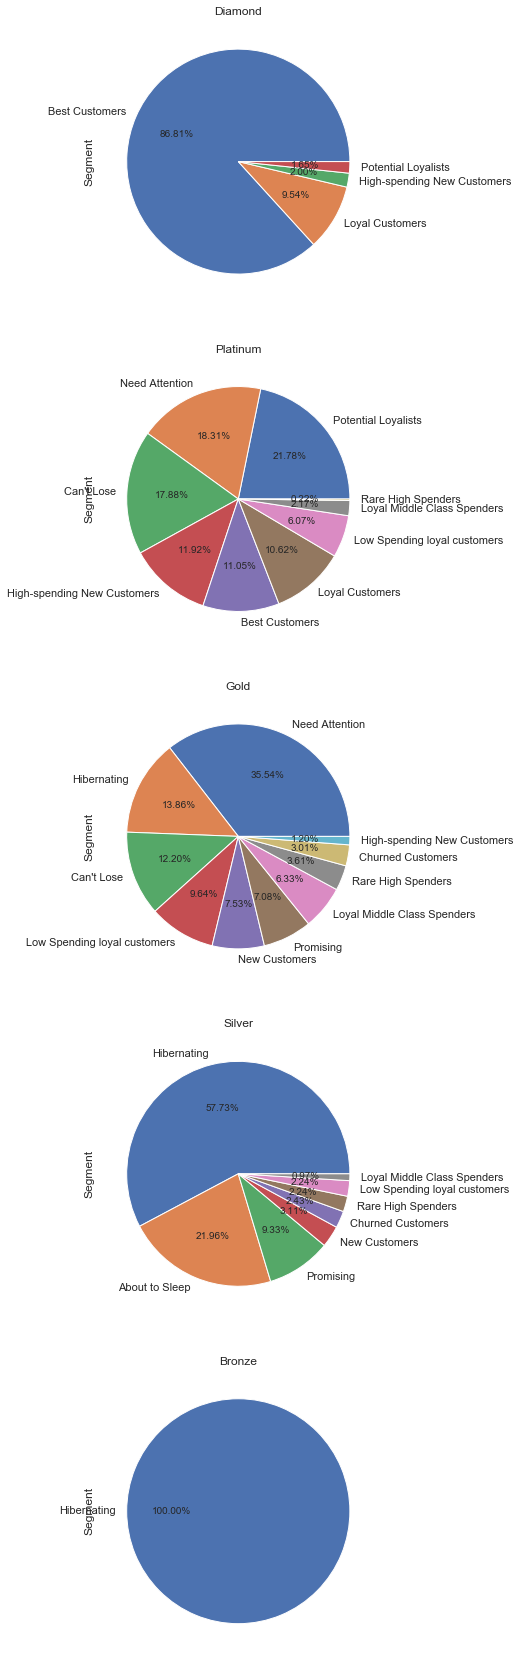

In [61]:
fig, ax=plt.subplots(5, figsize=(5,30))
rfm_uk[rfm_uk.Class=='Diamond'].Segment.value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax[0], title='Diamond')
rfm_uk[rfm_uk.Class=='Platinum'].Segment.value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax[1], title='Platinum')
rfm_uk[rfm_uk.Class=='Gold'].Segment.value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax[2], title='Gold')
rfm_uk[rfm_uk.Class=='Silver'].Segment.value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax[3], title='Silver')
rfm_uk[rfm_uk.Class=='Bronze'].Segment.value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax[4], title='Bronze')
plt.savefig('Pie Chart Segment UK.png', bbox_inches='tight')
plt.show()

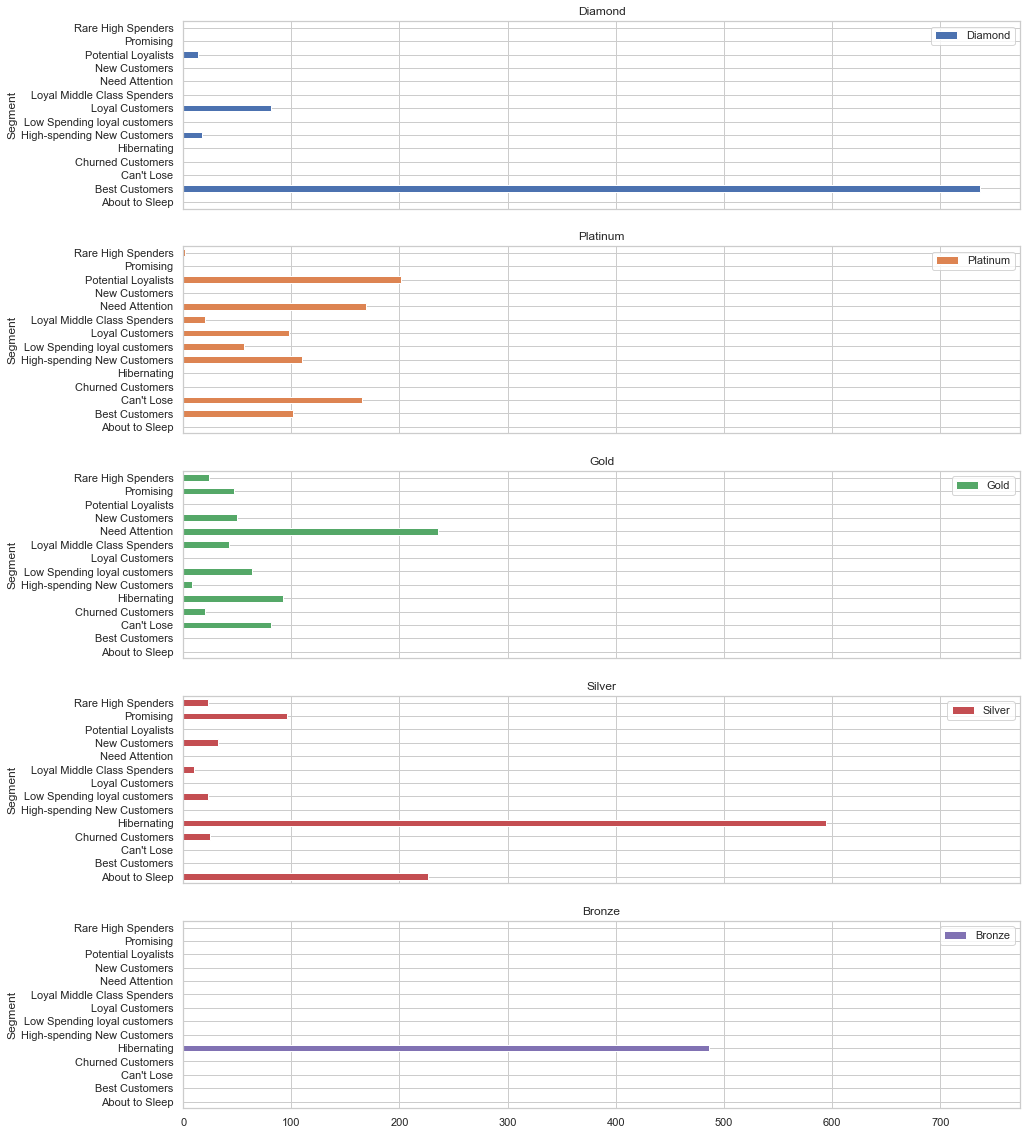

In [62]:
rfm_uk.groupby(['Segment']).Class.value_counts().unstack().plot(kind='barh', subplots=True, figsize=(15,20))
plt.savefig('Bar Chart per Segment UK', bbox_inches='tight')
plt.show()

In [42]:
rfm_uk.head()

CustomerID  Recency  Frequency  Monetary  R  F  M  Scores    Class  \
0      12346      326          2      0.00  5  5  5      15   Bronze   
1      12747        3        103   4196.01  1  2  1       4  Diamond   
2      12748        1       4642  29072.10  1  1  1       3  Diamond   
3      12749        4        231   3868.20  1  1  1       3  Diamond   
4      12820        4         59    942.34  1  2  2       5  Diamond   

  RFMScores         Segment  
0       555     Hibernating  
1       121  Best Customers  
2       111  Best Customers  
3       111  Best Customers  
4       122  Best Customers

In [43]:
print(df_uk.shape)
print(rfm_uk.shape)

(494024, 11)
(3951, 11)


In [44]:
rfm_uk.to_csv('rfm_uk.csv', index=False)

In [45]:
df_uk.to_csv('df_uk.csv', index=False)

In [46]:
uk_result=pd.merge(df_uk, rfm_uk)

# Others Country

In [47]:
df_other['InvoiceDate'].sort_values(ascending=False).head()

541908   2017-12-07
540450   2017-12-07
540359   2017-12-07
540358   2017-12-07
540357   2017-12-07
Name: InvoiceDate, dtype: datetime64[ns]

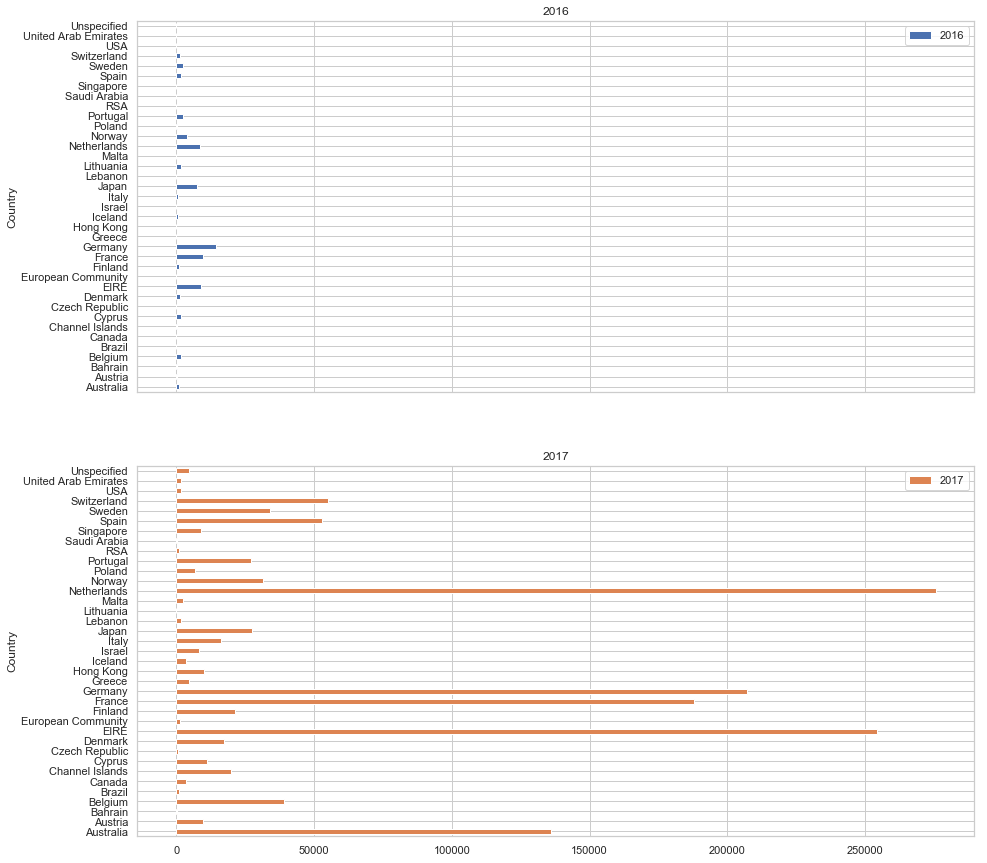

In [48]:
df_other.groupby(['Country', 'Year']).spend.sum().unstack().plot(kind='barh', subplots=True, figsize=(15,15))
plt.show()

In [49]:
latest_date_other=dt.datetime(2017,12,8)
rfm_other=df_other.groupby(df_other['CustomerID']).agg({'InvoiceDate': lambda x:(latest_date_other-x.max()).days, # Recency
                                            'InvoiceNo': lambda x:len(x), # Frequency
                                            'spend': lambda x:x.sum()}).reset_index()# Monetary
rfm_other.head()

CustomerID  InvoiceDate  InvoiceNo    spend
0      12347            3        182  4310.00
1      12348           76         31  1797.24
2      12349           19         73  1757.55
3      12350          311         17   334.40
4      12352           37         95  1545.41

In [50]:
# change column name
rfm_other.rename(columns={'InvoiceDate': 'Recency',
                'InvoiceNo': 'Frequency',
                'spend': 'Monetary'}, inplace=True)
rfm_other.head()

CustomerID  Recency  Frequency  Monetary
0      12347        3        182   4310.00
1      12348       76         31   1797.24
2      12349       19         73   1757.55
3      12350      311         17    334.40
4      12352       37         95   1545.41

In [51]:
# divide the category using quantile into 5 category
quantiles_other=rfm_other.quantile(q=[0.20, 0.40, 0.60, 0.80])
quantiles_other=quantiles_other.to_dict()
quantiles_other

{'Recency': {0.2: 11.0, 0.4: 30.0, 0.6: 73.0, 0.8: 182.4000000000001},
 'Frequency': {0.2: 18.0,
  0.4: 34.0,
  0.6: 62.19999999999999,
  0.8: 129.60000000000002},
 'Monetary': {0.2: 371.9520000000001,
  0.4: 704.5020000000002,
  0.6: 1332.9940000000001,
  0.8: 3256.0420000000017}}

In [52]:
rfm_other['R']=rfm_other['Recency'].apply(r_score, args=('Recency',quantiles_other,))
rfm_other['F']=rfm_other['Frequency'].apply(fm_score, args=('Frequency',quantiles_other,))
rfm_other['M']=rfm_other['Monetary'].apply(fm_score, args=('Monetary',quantiles_other,))
rfm_other.head()

CustomerID  Recency  Frequency  Monetary  R  F  M
0      12347        3        182   4310.00  1  1  1
1      12348       76         31   1797.24  4  4  2
2      12349       19         73   1757.55  2  2  2
3      12350      311         17    334.40  5  5  5
4      12352       37         95   1545.41  3  2  2

In [53]:
rfm_other['Scores']=(rfm_other.R.map(int) + rfm_other.F.map(int) + rfm_other.M.map(int))
rfm_other.head()

CustomerID  Recency  Frequency  Monetary  R  F  M  Scores
0      12347        3        182   4310.00  1  1  1       3
1      12348       76         31   1797.24  4  4  2      10
2      12349       19         73   1757.55  2  2  2       6
3      12350      311         17    334.40  5  5  5      15
4      12352       37         95   1545.41  3  2  2       7

In [54]:
level_other=pd.qcut(rfm_other['Scores'], q=5, labels=label)
rfm_other['Class']=level_other.values
rfm_other.head()

CustomerID  Recency  Frequency  Monetary  R  F  M  Scores     Class
0      12347        3        182   4310.00  1  1  1       3   Diamond
1      12348       76         31   1797.24  4  4  2      10      Gold
2      12349       19         73   1757.55  2  2  2       6  Platinum
3      12350      311         17    334.40  5  5  5      15    Bronze
4      12352       37         95   1545.41  3  2  2       7  Platinum

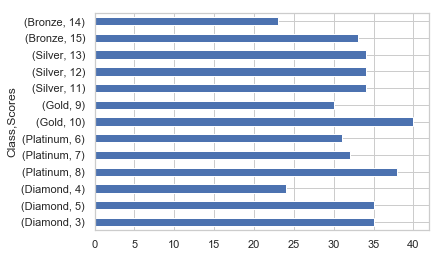

In [55]:
rfm_other.groupby('Class').Scores.value_counts().plot(kind='barh')

In [56]:
rfm_other['RFMScores']=(rfm_other.R.map(str) + rfm_other.F.map(str) + rfm_other.M.map(str))
rfm_other.head()

CustomerID  Recency  Frequency  Monetary  R  F  M  Scores     Class  \
0      12347        3        182   4310.00  1  1  1       3   Diamond   
1      12348       76         31   1797.24  4  4  2      10      Gold   
2      12349       19         73   1757.55  2  2  2       6  Platinum   
3      12350      311         17    334.40  5  5  5      15    Bronze   
4      12352       37         95   1545.41  3  2  2       7  Platinum   

  RFMScores  
0       111  
1       442  
2       222  
3       555  
4       322

In [57]:
rfm_other['Segment']=rfm_other['RFMScores'].replace(segment, regex=True)
rfm_other['Segment'].value_counts()

Hibernating                     130
Best Customers                   97
Need Attention                   41
About to Sleep                   29
Potential Loyalists              28
Can't Lose                       25
Promising                        16
Low Spending loyal customers     14
Loyal Customers                  14
New Customers                     9
Rare High Spenders                7
Loyal Middle Class Spenders       7
High-spending New Customers       5
Churned Customers                 1
Name: Segment, dtype: int64

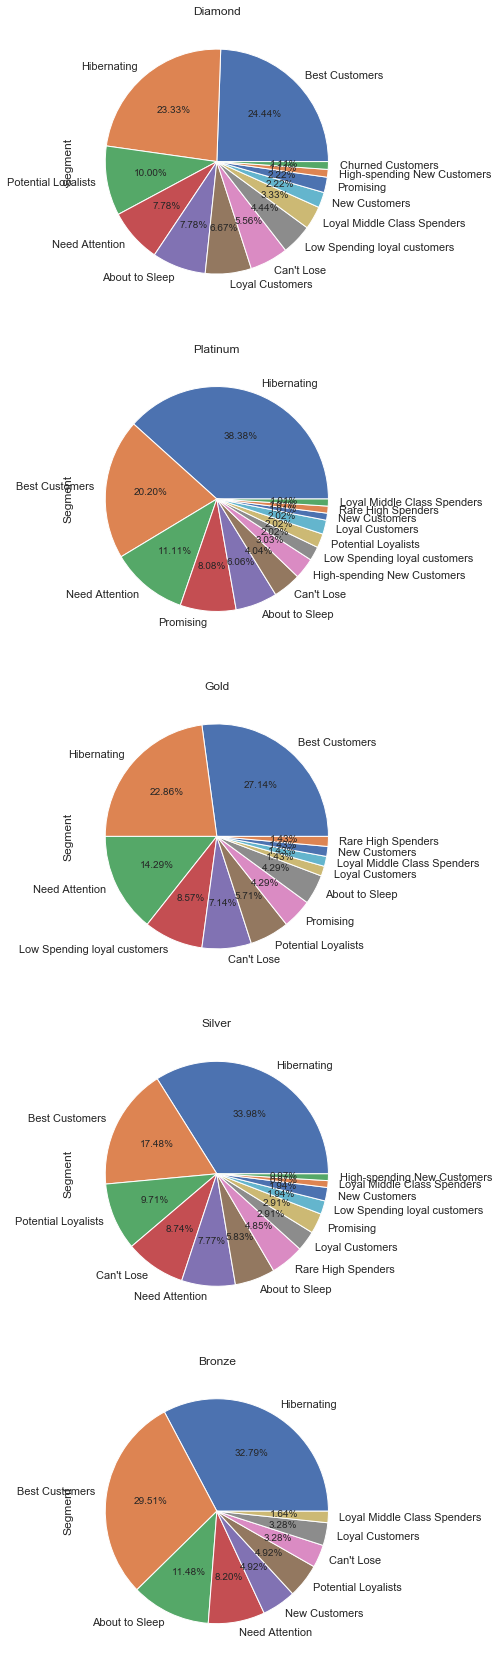

In [58]:
fig, ax=plt.subplots(5, figsize=(5,30))
rfm_other[rfm_uk.Class=='Diamond'].Segment.value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax[0], title='Diamond')
rfm_other[rfm_uk.Class=='Platinum'].Segment.value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax[1], title='Platinum')
rfm_other[rfm_uk.Class=='Gold'].Segment.value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax[2], title='Gold')
rfm_other[rfm_uk.Class=='Silver'].Segment.value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax[3], title='Silver')
rfm_other[rfm_uk.Class=='Bronze'].Segment.value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax[4], title='Bronze')
plt.show()

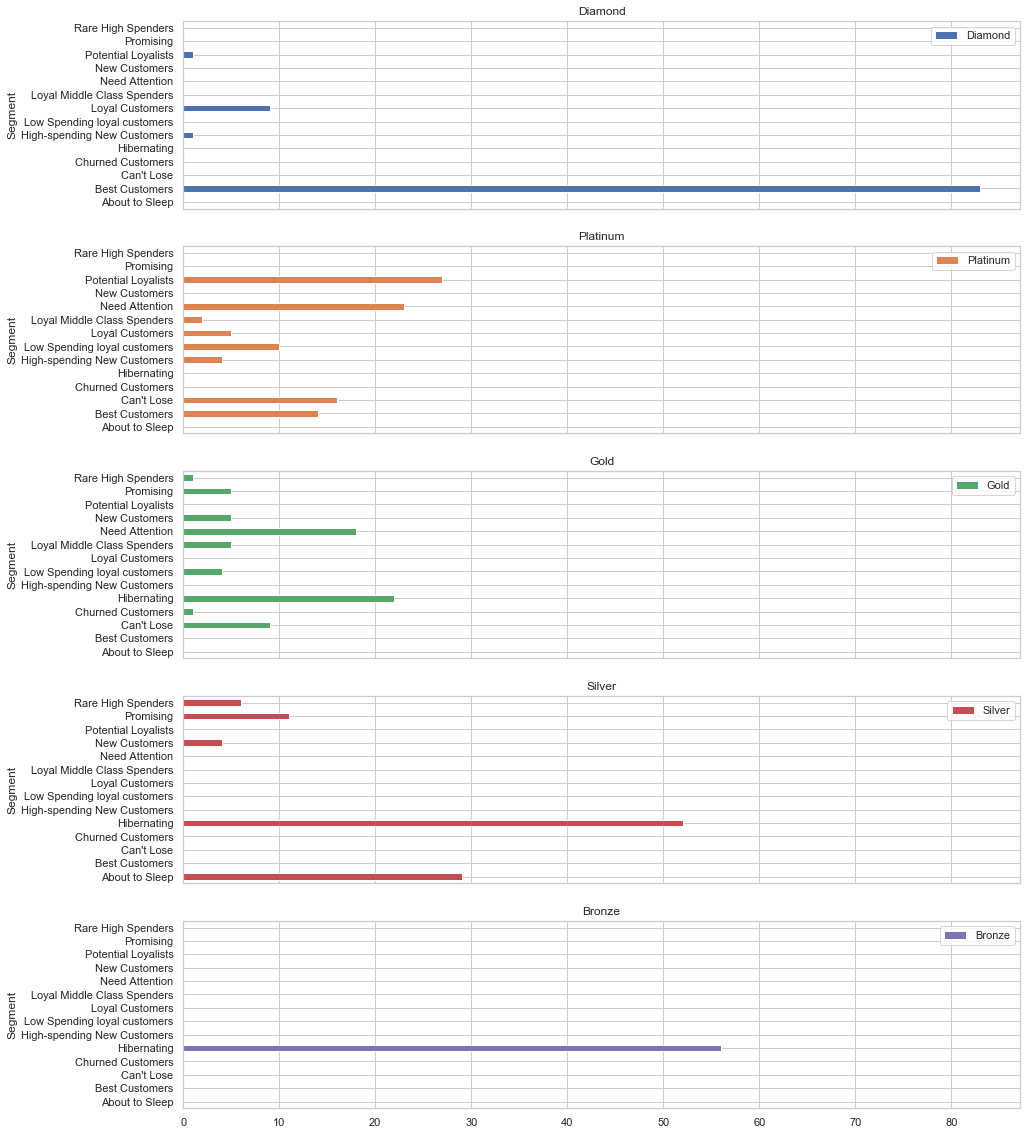

In [59]:
rfm_other.groupby(['Segment']).Class.value_counts().unstack().plot(kind='barh', subplots=True, figsize=(15,20))
plt.show()

In [60]:
rfm_other.head()

CustomerID  Recency  Frequency  Monetary  R  F  M  Scores     Class  \
0      12347        3        182   4310.00  1  1  1       3   Diamond   
1      12348       76         31   1797.24  4  4  2      10      Gold   
2      12349       19         73   1757.55  2  2  2       6  Platinum   
3      12350      311         17    334.40  5  5  5      15    Bronze   
4      12352       37         95   1545.41  3  2  2       7  Platinum   

  RFMScores         Segment  
0       111  Best Customers  
1       442  Need Attention  
2       222  Best Customers  
3       555     Hibernating  
4       322  Need Attention